In [1]:
import pandas as pd

In [ ]:
!pip install spacy -U
!python -m spacy download pl_core_news_lg

In [3]:
import spacy
import os
import regex as re
import numpy as np
from tqdm import tqdm

In [4]:
nlp = spacy.load("pl_core_news_lg")

In [5]:
MAIN_DATA = pd.read_csv("/content/maturka zadanko - all_tweets_id (1)matura - all_tweets_id (1).csv")

In [6]:
df = MAIN_DATA.copy()

Część 1

In [7]:
#1 Zamień skróty nazw dni tygodnia na polskie odpowiedniki (pełne nazwy dni tygodnia) - kolumna created_at
df["created_at"] = [elem.replace("Mon", "Poniedziałek") for elem in df["created_at"]]
df["created_at"] = [elem.replace("Tue", "Wtorek") for elem in df["created_at"]]
df["created_at"] = [elem.replace("Wed", "Środa") for elem in df["created_at"]]
df["created_at"] = [elem.replace("Thu", "Czwartek") for elem in df["created_at"]]
df["created_at"] = [elem.replace("Fri", "Piątek") for elem in df["created_at"]]
df["created_at"] = [elem.replace("Sat", "Sobota") for elem in df["created_at"]]
df["created_at"] = [elem.replace("Sun", "Niedziela") for elem in df["created_at"]]
df["created_at"]

0       Poniedziałek May 03 19:39:15 +0000 2021
1       Poniedziałek May 03 19:37:48 +0000 2021
2       Poniedziałek May 03 19:37:03 +0000 2021
3       Poniedziałek May 03 19:37:11 +0000 2021
4       Poniedziałek May 03 19:37:21 +0000 2021
                         ...                   
7274       Niedziela Apr 25 21:17:50 +0000 2021
7275       Niedziela Apr 25 20:29:36 +0000 2021
7276       Niedziela Apr 25 22:00:16 +0000 2021
7277       Niedziela Apr 25 22:05:33 +0000 2021
7278       Niedziela Apr 25 21:18:19 +0000 2021
Name: created_at, Length: 7279, dtype: object

In [ ]:
#2 Zamień skróty nazw miesięcy na liczbowe odpowiedniki (np Jun na 06) - kolumna user_created_at
df["user_created_at"] = [elem.replace("Jan", "01") for elem in df["user_created_at"]]
df["user_created_at"] = [elem.replace("Feb", "02") for elem in df["user_created_at"]]
df["user_created_at"] = [elem.replace("Mar", "03") for elem in df["user_created_at"]]
df["user_created_at"] = [elem.replace("Apr", "04") for elem in df["user_created_at"]]
df["user_created_at"] = [elem.replace("May", "05") for elem in df["user_created_at"]]
df["user_created_at"] = [elem.replace("Jun", "06") for elem in df["user_created_at"]]
df["user_created_at"] = [elem.replace("Jul", "07") for elem in df["user_created_at"]]
df["user_created_at"] = [elem.replace("Aug", "08") for elem in df["user_created_at"]]
df["user_created_at"] = [elem.replace("Sep", "09") for elem in df["user_created_at"]]
df["user_created_at"] = [elem.replace("Oct", "10") for elem in df["user_created_at"]]
df["user_created_at"] = [elem.replace("Nov", "11") for elem in df["user_created_at"]]
df["user_created_at"] = [elem.replace("Dec", "12") for elem in df["user_created_at"]]
df["user_created_at"]

In [ ]:
#3 Pobierz wszystkie linki do tweetów i przekaż je do listy.
tweety = df["tweet_url"]
tweety.tolist()

In [ ]:
from numpy.core.numeric import NaN
#4 Pobierz wszystkie linki znajdujące się w tweetach i przekaż je do listy (kolumna urls)
urls = df["urls"]
linki = []
war = urls.isnull()
k = 1

for i in range(0,7278):
  if war.loc[k] == False:
    linki.append(urls[k])
  k = k + 1

linki

In [ ]:
#5 Pobierz wszystkie linki do obrazków i przekaż je do listy (kolumna media).
media = df["media"]
obrazy = []
war2 = media.isnull()
k = 1

for i in range(0,7278):
  if war2.loc[k] == False:
    obrazy.append(media[k])
  k = k + 1

obrazy

In [ ]:
#6 - Usuń wszystkie słowa oznaczone jako stopwords i przekaż oczyszczony tekst do nowej kolumny o nazwie text_without_stopwords
sw_spacy = nlp.Defaults.stop_words
sw_spacy

In [ ]:
df['text_without_stopwords'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (sw_spacy)]))

In [ ]:
df[['text_without_stopwords', 'text']]

Część 2

In [ ]:
#1 Wypisz top5 tweetów z największa liczbą polubień.
df.sort_values("favorite_count", ascending = False).head(5)

In [ ]:
#2 Wypisz top5 tweetów z największa liczbą retweetów.
df.sort_values("retweet_count", ascending = False).head(5)

In [ ]:
#3 Wyświetl tylko te tweety, które nie są uznane jako “wrażliwe” (kolumna possibly_sensitive).
df[df.possibly_sensitive != True]

In [ ]:
#4 Wyświetl tweety użytkownika, który założył konto najwcześniej (spośród wszystkich użytkowników w datasecie) (kolumna user_created_at).
df['user_created_at'] = pd.to_datetime(df['user_created_at'])
date = df['user_created_at'].min()
najstarszy_użytkownik = df.loc[df.user_created_at == date, 'user_id'].values[0]

df[df.user_id == najstarszy_użytkownik]

In [ ]:
#5 Wyświetl tweety użytkownika. który ma najwięcej followersów.
najwięcej_followers = df['user_followers_count'].max()
followers = df.loc[df.user_followers_count == najwięcej_followers, 'user_id'].values[0]

df[df.user_id == followers]

In [ ]:
#6 Wyświetl tylko zweryfikowanych użytkowników (kolumna user_verified)
df[df.user_verified == True]

In [11]:
#7 Podaj, w który dzień tygodnia najczęściej były publikowane tweety z datasetu
zmienna = df["created_at"]

Poniedzialek = 0
Wtorek = 0
Sroda = 0
Czwartek = 0 
Piatek = 0
Sobota = 0 
Niedziela = 0

k = 0

for i in range(0,7278):
  a = zmienna[k]
  if a[0:2] == "Po":
    Poniedzialek = Poniedzialek + 1
  elif a[0] == "W":
      Wtorek = Wtorek + 1
  elif a[0] == "Ś":
        Sroda = Sroda + 1
  elif a[0] == "C":
          Czwartek = Czwartek + 1
  elif a[0:2] == "Pi":
            Piatek = Piatek + 1
  elif a[0] == "S":
              Sobota = Sobota + 1
  elif a[0] == "N":
                Niedziela = Niedziela + 1
  k = k + 1


print(Poniedzialek)
print(Wtorek)
print(Sroda)
print(Czwartek)
print(Piatek)
print(Sobota)
print(Niedziela)
#najwiecej jest w poniedziałek

3335
675
743
488
456
488
1093


Część 3

In [ ]:
#1 Rozpoznaj osoby (persName) i przekaż je do kolumny o nazwie persons
doc =[nlp(x) for x in df["text"]]

osoby_lista = []
for tweet in doc:
  osoby = ""
  for keyword in tweet.ents:
    if keyword.label_ == "persName":
      osoby = osoby + keyword.text + ", "
  
  osoby_lista.append(osoby)

assert len(osoby_lista) == df.shape[0]
df["Persons"] = osoby_lista

In [ ]:
df["Persons"]

In [ ]:
#2 Rozpoznaj miejsca (placeName) i przekaż je do kolumny o nazwie places
miejsca = []
for tweet in doc:
  places = ""
  for keyword in tweet.ents:
    if keyword.label_ == "placeName":
      places = places + keyword.text + ", "
  
  miejsca.append(places)

assert len(miejsca) == df.shape[0]
df["Places"] = miejsca

In [ ]:
df["Places"]

In [ ]:
#3 Rozpoznaj organizacje (orgName) i przekaż je do kolumny o nazwie organizations
organizacje = []
for tweet in doc:
  org = ""
  for keyword in tweet.ents:
    if keyword.label_ == "orgName":
      org = org + keyword.text + ", "
  
  organizacje.append(org)

assert len(organizacje) == df.shape[0]
df["Organizations"] = organizacje

In [ ]:
df["Organizations"]

In [13]:
#4 Stwórz model, który rozpozna hashtagi w treści tweeta. Następnie przekaż je do kolumny o nazwie hashtags
nlp = spacy.blank("pl")
ruler = nlp.add_pipe("entity_ruler")

pattern = "\S+"
patterns = [{"label": "NUMER_TELEFONU", "pattern": [{"ORTH": "#"}, {"TEXT": {"REGEX": pattern}}]}]

ruler.add_patterns(patterns)

In [ ]:
doc = [nlp(x) for x in df["text"]]
hasztagi = []

for tweet in doc:
  hasztag =[]
  for keyword in tweet.ents:
    if keyword.label == "Hashtag":
      hasztag = hasztag + keyword.text + ", "
  hasztagi.append(hasztagi)

df["hasztagi"] = hasztagi

Część 4

In [9]:
#1 Wykorzystując pakiet matplotlib wykonaj wykres ilustrujący liczbę tweetów per dzień tygodnia
import matplotlib as mpl
import matplotlib.pyplot as plt

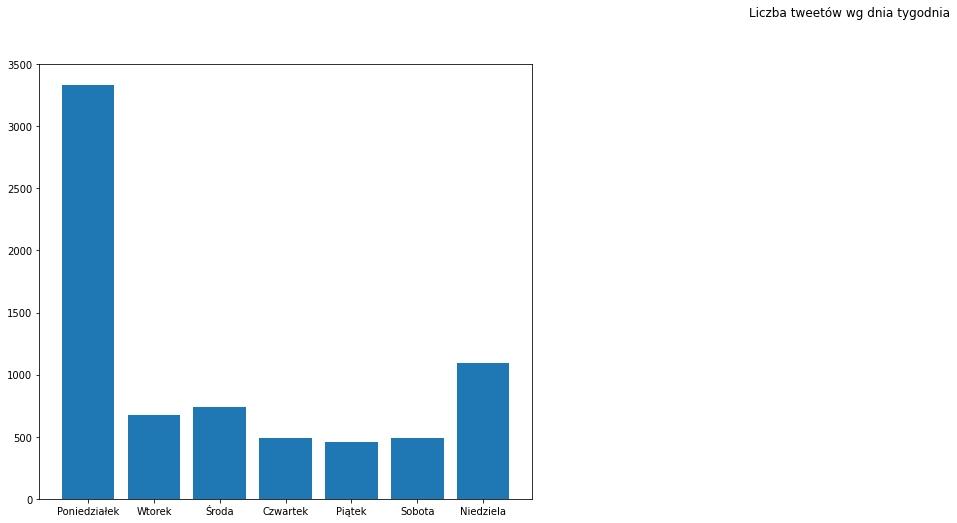

In [12]:
names = ["Poniedziałek", "Wtorek", "Środa", "Czwartek", "Piątek", "Sobota", "Niedziela"]
values = [Poniedzialek, Wtorek, Sroda, Czwartek, Piatek, Sobota, Niedziela]

plt.figure(figsize=(30, 8))

plt.subplot(131)
plt.bar(names, values)
plt.suptitle("Liczba tweetów wg dnia tygodnia")
plt.show()